In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import re as re
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import StandardScaler

In [2]:
path = 'E:/Education/CCSU-Thesis-2024/Data/final-results/'
distinct_perf_file = path + 'Distinct-CV-Hyperparameter-Perf.csv' 
similar_perf_file = path + 'Similar-CV-Hyperparameter-Perf.csv' 
df = pd.read_csv(distinct_perf_file)
df2 = pd.read_csv(similar_perf_file)
#df1 = pd.print('Distinct Data')('E:/Education/CCSU-Thesis-2024/Data/perf.csv')
#df2 = pd.read_csv('E:/Education/CCSU-Thesis-2024/Data/perf1.csv')
#df3 = pd.read_csv('E:/Education/CCSU-Thesis-2024/Data/perf2.csv')
#df = pd.concat([df0, df1, df2, df3], ignore_index=True, axis=0)
#df = df.drop(df.columns[0], axis = 1) 
distinct_df = df.loc[df['Cycle']=='Val']
ccols = ['Fold_no', 'Batch', 'LR', 'Beta1', 'Beta2', 'Wdecay', 'Epoch', 'Cycle',
       'T1', 'T2', 'T3', 'T4', 'Accuracy'] 
distinct_df = distinct_df.loc[df['Cycle'] == 'Val', ccols].sort_values(by=['Accuracy'], ascending=[False])
print('Distinct Data')
print(distinct_df[0:5])
similar_df = df2.loc[df2['Cycle']=='Val']
similar_df = similar_df.loc[df2['Cycle'] == 'Val', ccols].sort_values(by=['Accuracy'], ascending=[False])
print('Similar Data')
print(similar_df[0:5])


Distinct Data
   Fold_no  Batch       LR  Beta1  Beta2  Wdecay  Epoch Cycle  T1  T2  T3  T4  \
0       19      8  0.00004   0.90   0.99   0.000      3   Val  16  16  14  12   
1        7     32  0.00004   0.80   0.90   0.001      5   Val  13  16  15  13   
2       12      8  0.00002   0.85   0.98   0.000      4   Val  12  14  17  11   
3       12      8  0.00002   0.85   0.98   0.000      5   Val  16  14  14  10   
4       12      8  0.00002   0.85   0.98   0.000      7   Val  16  14  13  11   

   Accuracy  
0  0.763158  
1  0.750000  
2  0.739726  
3  0.739726  
4  0.739726  
Similar Data
   Fold_no  Batch       LR  Beta1  Beta2  Wdecay  Epoch Cycle  T1  T2  T3  T4  \
0       12      8  0.00002   0.85   0.98   0.000      4   Val  17  15  15  12   
1        7     32  0.00004   0.80   0.90   0.001      2   Val  11  16  17  12   
2       12      8  0.00002   0.85   0.98   0.000      7   Val  16  15  15  12   
3       27     16  0.00004   0.90   0.99   0.001      2   Val  13  15  14  12 

In [3]:
distinct_df.sort_values(by='Accuracy', ascending=False)                            

,Fold_no,Batch,LR,Beta1,Beta2,Wdecay,Epoch,Cycle,T1,T2,T3,T4,Accuracy
0,19,8,0.00004,0.90,0.99,0.000,3,Val,16,16,14,12,0.763158
1,7,32,0.00004,0.80,0.90,0.001,5,Val,13,16,15,13,0.750000
2,12,8,0.00002,0.85,0.98,0.000,4,Val,12,14,17,11,0.739726
3,12,8,0.00002,0.85,0.98,0.000,5,Val,16,14,14,10,0.739726
4,12,8,0.00002,0.85,0.98,0.000,7,Val,16,14,13,11,0.739726
...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,16,16,0.00004,0.99,0.99,0.010,5,Val,0,0,0,18,0.240000
164,1,8,0.00002,0.80,0.99,0.100,1,Val,14,0,4,0,0.236842
165,10,16,0.00002,0.85,0.99,0.100,0,Val,5,0,12,0,0.226667
166,10,16,0.00002,0.85,0.99,0.100,3,Val,6,0,11,0,0.226667


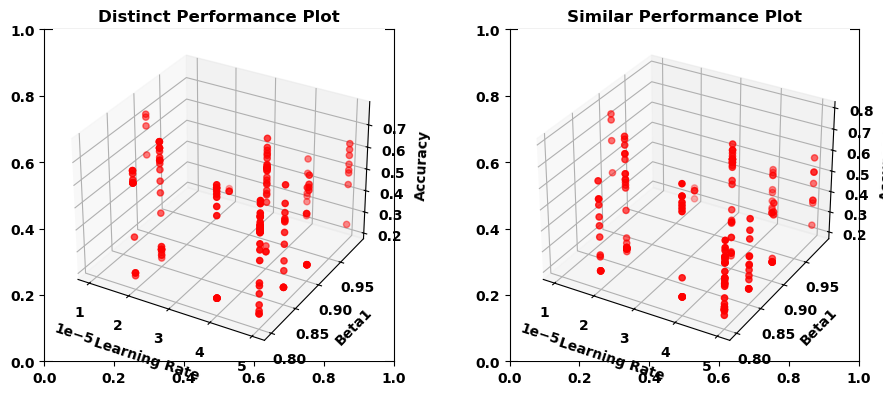

In [4]:
#fig = plt.figure(figsize=(10, 20))
#fig = plt.figure(figsize=plt.figaspect(0.5))
fig, axs = plt.subplots(1, 2, figsize=(10, 5), clear=True)
plt.grid(visible=False)
axs[0] = fig.add_subplot(1,2,1, projection='3d')
axs[0].scatter(distinct_df['LR'], distinct_df['Beta1'], distinct_df['Accuracy'], c='r', marker='o')
axs[0].set_title('Distinct Performance Plot')
axs[0].set_xlabel('Learning Rate')
axs[0].set_ylabel('Beta1')
axs[0].set_zlabel('Accuracy')

axs[1] = fig.add_subplot(1,2,2, projection='3d')
axs[1].set_xlabel('Learning Rate')
axs[1].scatter(similar_df['LR'], similar_df['Beta1'], similar_df['Accuracy'], c='r', marker='o')
axs[1].set_title('Similar Performance Plot')
axs[1].set_xlabel('Learning Rate')
axs[1].set_ylabel('Beta1')
axs[1].set_zlabel('Accuracy')
#axs[1].grid('False')
fig.tight_layout(pad=5.0)
plt.show()


In [19]:
# This builds a quadratic model with capture performance data
from statsmodels.formula.api import ols
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# This formula included Epochs
#formula = '''Accuracy ~ LR + Beta1 + Beta2 + Wdecay + Epoch + Batch + I(LR**2) + I(Beta1**2) + I(Beta2**2)  
#            + I(Wdecay**2) + I(Epoch**2) + I(Batch**2) + LR*Beta1 + LR*Beta2 + LR*Wdecay + LR*Epoch + LR*Batch  
#            + Beta1*Beta2 + Beta1*Wdecay + Beta1*Epoch + Beta1*Batch + Beta2*Wdecay + Beta2*Epoch + Beta2*Batch 
#            + Epoch*Batch'''

# This formula does not included Epochs
formula = '''Accuracy ~ LR + Beta1 + Beta2 + Wdecay + Batch + I(LR**2) + I(Beta1**2) + I(Beta2**2)  
            + I(Wdecay**2) + I(Batch**2) + LR*Beta1 + LR*Beta2 + LR*Wdecay + LR*Batch  
            + Beta1*Beta2 + Beta1*Wdecay + Beta1*Batch + Beta2*Wdecay + Beta2*Batch '''

model8 = ols(formula, data=distinct_df).fit()
print(model8.summary())


                            OLS Regression Results                            
Dep. Variable:               Accuracy   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     54.51
Date:                Sat, 18 Jan 2025   Prob (F-statistic):           5.44e-57
Time:                        11:10:04   Log-Likelihood:                 219.68
No. Observations:                 168   AIC:                            -399.4
Df Residuals:                     148   BIC:                            -336.9
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         28.1572     16.554      1.

In [10]:
temp_df = pd.DataFrame({'LearningRate': [0.00004], 'Beta1': [0.80], 'Beta2': [0.999], 'Wdecay': [0], 
                                        'Epoch': [5]})
output = lasso.predict(temp_df) 
#0.00004 	0.80 	0.999 	0.000 	5 	
#output
print(lasso)

NameError: name 'lasso' is not defined

In [6]:
# Optimize fuction
from scipy.optimize import minimize
scaler = StandardScaler()
from sklearn.metrics import r2_score

# Define the objective function (we negate the output for maximization)
def objective(params, model):
    
    LR,Beta1,Beta2,Wdecay,Epoch = params
    
    return -model.predict(pd.DataFrame({'LR': [LR], 'Beta1': [Beta1], 'Beta2': [Beta2], 'Wdecay': [Wdecay], 
                                        'Epoch': [Epoch]}))[0]  # Negative because we are maximizing

# Initial guess for the independent variables
initial_guess = [.00002, 0.85, 0.98, 0.01, 1]  # For example, start with [0, 0, 0, 0, 0]

# Setup independent and dependent variables
Y = df['Accuracy']
X = df[['LR','Beta1','Beta2', 'Wdecay','Epoch']]
print(len(df))
#standardize data
#X_scaled = scaler.fit_transform(X)
#Fit lasso Model
#model_l = Lasso(alpha=0.1)
modele = ElasticNet(alpha=0.1, l1_ratio=0.2)
modele.fit(X, Y)
y_pred = modele.predict(X)
print(y_pred[0:10])
print('r2', r2_score(Y, y_pred))
# Perform the optimization
result = minimize(objective, initial_guess, args=(modele,), bounds=[(.00002, .002), (0.85, 0.95), (0.98, 0.999), (0.01, 0.1), (1,20)],method='L-BFGS-B')
#bounds=[(.00002, .002), (0.85, 0.95), (0.98, 0.999), (0.01, 0.1), (1,20)],method='L-BFGS-B')
# The optimal values of X that maximize A
optimal_X = result.x
optimal_A = -result.fun  # Negate back to get the maximized A

print(f"Optimal values of X: {optimal_X}")
print(f"Maximum value of A: {optimal_A}")


336
[0.54370965 0.60488625 0.57429795 0.60488625 0.66606284 0.48253305
 0.54370965 0.57429795 0.54370965 0.66606284]
r2 0.1019392395630776
Optimal values of X: [2.0e-05 8.5e-01 9.8e-01 1.0e-02 2.0e+01]
Maximum value of A: 1.0637107264937657


In [12]:
import statsmodels.api as sm
import numpy as np

#df.columns

Y = df['Accuracy']
X1 = df['LR']
X2 = df['Beta1']
X3 = df['Beta2']
X4 = df['Wdecay']
X5 = df['Epoch']

X1_sq = x1 ** 2
X2_sq = x2 ** 2
X3_sq = x3 ** 2
X4_sq = x4 ** 2
X5_sq = x5 ** 2

X1_X2 = X1 * X2
X1_X3 = X1 * X3
X1_X4 = X1 * X4
X1_X5 = X1 * X5
X2_X3 = X2 * X3
X2_X4 = X2 * X4
X2_X5 = X2 * X5
X3_X4 = X3 * X4
X3_X5 = X3 * X5
X4_X5 = X4 * X5

X_design = sm.add_constant(np.column_stack([X1, X2, X3, X4, X5, X1_sq, X2_sq, X3_sq, X4_sq, X5_sq,
                                           X1_X2, X1_X3, X1_X4, X1_X5, X2_X3, X2_X4, X2_X5, X3_X4, X3_X5, X4_X5]))

# Fit the model
model8 = sm.OLS(Y, X_design).fit()
print(model8.summary())


NameError: name 'x1' is not defined

In [20]:
from scipy.optimize import minimize

def objective(params):
    LR, Beta1, Beta2, Wdecay, Epoch, Batch = params
    #print('Input', LR, Beta1, Beta2, Wdecay)
    temp_df = pd.DataFrame({'LR': [LR], 'Beta1':[Beta1], 'Beta2':[Beta2], 'Wdecay':[Wdecay],
                            'Epoch':[Epoch], 'Batch':[Batch]})
    #print(temp_df)
    return -model8.predict(temp_df)[0]

initial_guess = [1e-5, 0.85, 0.95, 0, 1, 8]
result = minimize(objective, initial_guess, bounds=[(1e-5, 1e-4), (0.85, 0.95), (0.95, 0.999), (0, 0.1), (1,20), (8,32)], method='Nelder-Mead')
optimal_params = result.x

print(f'Optimal Learning Rate: {optimal_params[0]}')
print(f'Optimal Batch Size: {optimal_params[5]}')
print(f'Optimal Beta1: {optimal_params[1]}')
print(f'Optimal Beta2: {optimal_params[2]}')
print(f'Optimal Wdecay: {optimal_params[3]}')
print(f'Optimal Epoch: {optimal_params[4]}')


Optimal Learning Rate: 1e-05
Optimal Batch Size: 8.0
Optimal Beta1: 0.85
Optimal Beta2: 0.9500000000000002
Optimal Wdecay: 0.0
Optimal Epoch: 1.0288537247657703
